#lab 3: point processing

Vì khi nhân img * 255.0, một số giá trị có thể vượt ngoài phạm vi [0, 255], do sai số số thực hoặc dữ liệu chưa chuẩn hóa tốt.
Nếu không clip, các giá trị vượt quá 255 sẽ bị wrap hoặc gây lỗi khi cast về uint8 (giới hạn là 0–255) clip đảm bảo an toàn và tránh lỗi.

Khi ảnh là 12-bit hoặc 16-bit, giá trị pixel nằm trong khoảng:
12-bit: [0, 4095]
16-bit: [0, 65535]

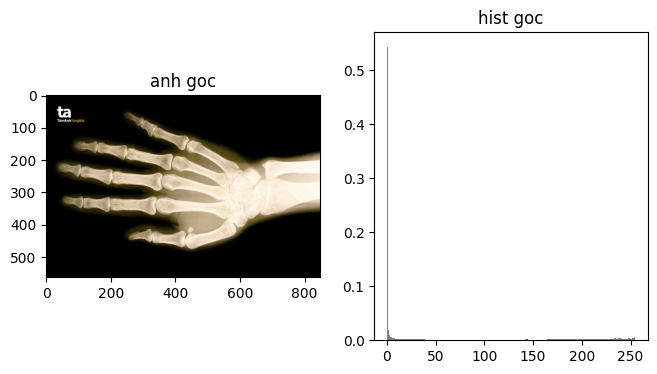

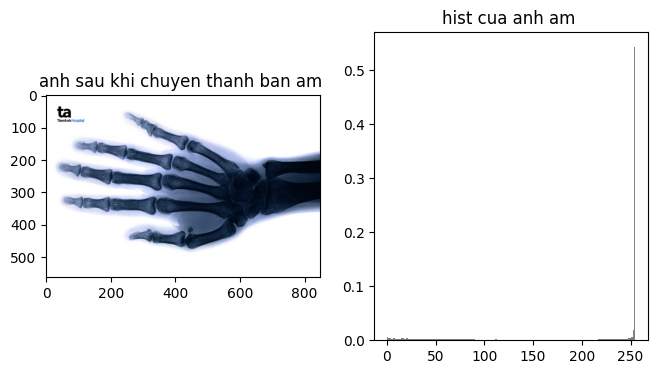

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/content/xuong.jpg")

plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.title("anh goc")
plt.imshow(img)
plt.subplot(1,3,2)
plt.title("hist goc")
plt.hist(img.ravel(), bins=256, range=[0, 255], density=True, color='gray')
plt.show()



def anham(img):
    return 255-img# chuyen vung toi thanh sang va nguoc lai

img1= anham(img)
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.title("anh sau khi chuyen thanh ban am ")
plt.imshow(img1,cmap="gray")
plt.subplot(1,3,2)
plt.title("hist cua anh am ")
plt.hist(img1.ravel(), bins=256, range=[0, 255], density=True, color='gray')
plt.show()
#hist cua anh am da chay ve phia 255 , nghia la trang nhieu hon den , anh da duoc doi nguoc mau

tlCauHoi:
vi cong thuc 255-img la dung muc xam toi da de tru di anh goc , nghia la neu pixel goc =255 thi (255-255)=0 chuyen sang mau den va nguoc lai

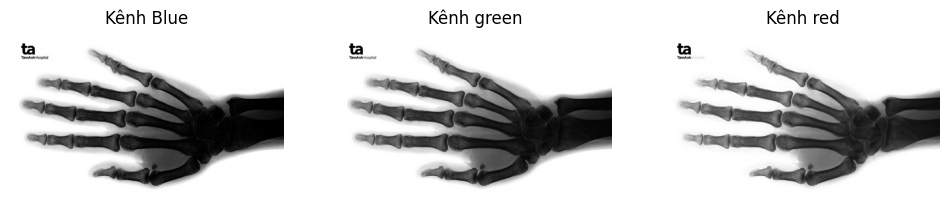

In [ ]:
b,g,r = cv2.split(img)
#import matplotlib.pyplot as plt
b1=anham(b)
r1=anham(r)
g1=anham(g)

plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.imshow(b1,cmap='gray')
plt.title("Kênh Blue")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(g1,cmap='gray')
plt.title("Kênh green")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(r1,cmap='gray')
plt.title("Kênh red")
plt.axis('off')
plt.show()


kenh do co vung sang nhieu hon cac kenh mau khac va kenh lam co do toi nhiu nhat trong tat ca cac kenh

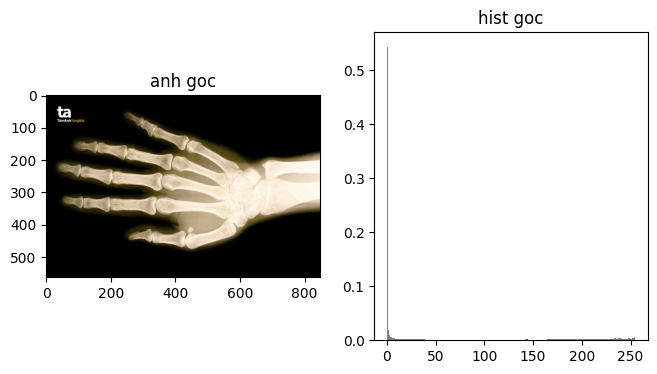

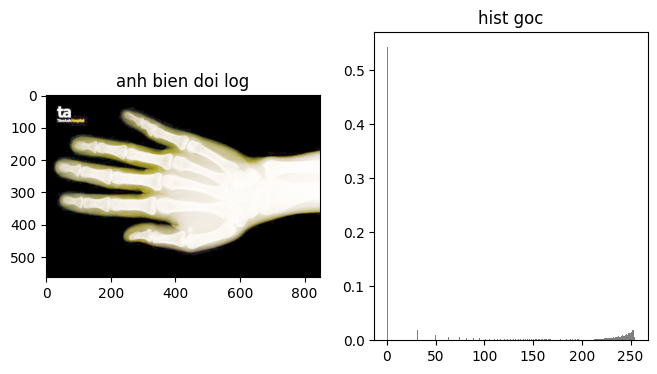

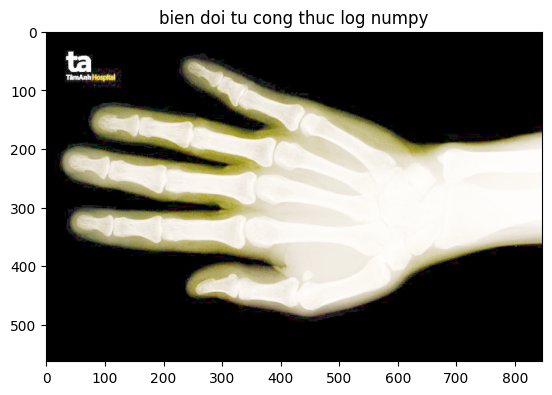

In [ ]:
def log(img):
  img_f=img.astype(float)
  c=255/np.log(1+255)
  out=c*np.log(1+img_f)
  return np.clip(out,0,255).astype(np.uint8)#cong thuc log, de tang cuong do sang do tuong phan

img2=log(img)
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.title("anh goc")
plt.imshow(img)
plt.subplot(1,3,2)
plt.title("hist goc")
plt.hist(img.ravel(), bins=256, range=[0, 255], density=True, color='gray')
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.title("anh bien doi log")
plt.imshow(img2)
plt.subplot(1,3,2)
plt.title("hist goc")
plt.hist(img2.ravel(), bins=256, range=[0, 255], density=True, color='gray')
plt.show()

#phan mo rong
img_2=np.log1p(img.astype(float))
img_2 = cv2.normalize(img_2, None, 0, 255, cv2.NORM_MINMAX)
#chuan hoa tu [0,1] sang [0,255]
img_2 = img_2.astype(np.uint8)


plt.imshow(img_2, cmap='gray')
plt.title("bien doi tu cong thuc log numpy")
plt.show()
#ko khac nhau lam

tlCauHoi:
Tăng độ tương phản ở vùng tối (có cường độ pixel thấp)
Giảm độ tương phản ở vùng sáng (có cường độ pixel cao)VD:Những chi tiết quan trọng (xương, mô mềm, khối u...) thường nằm ở vùng tối/trung gian.
Ánh sáng mạnh (nền trắng) không cần quá chi tiết.

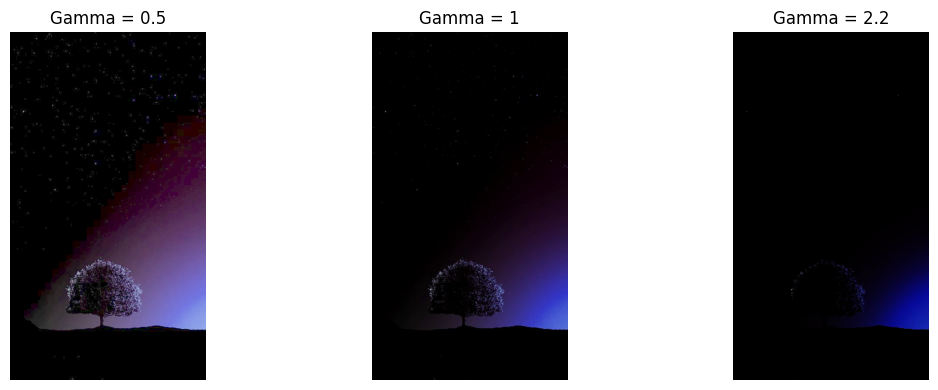

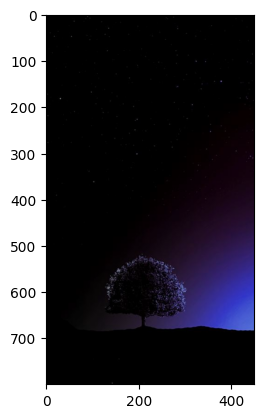

In [ ]:
img = cv2.imread("/content/cay.jpg")
def gamma(img, y):
    img_f = img.astype(np.float32) / 255.0
    out = np.power(img_f, y)

    # Chuyển lại về [0,255] và uint8
    out = np.clip(out * 255, 0, 255).astype(np.uint8)
    return out

y1, y2, y3 = 0.5, 1, 2.2

img4 = gamma(img, y1)
img5 = gamma(img, y2)
img6 = gamma(img, y3)

plt.figure(figsize=(12, 4))

for i, (img_gamma, y_val) in enumerate(zip([img4, img5, img6], [y1, y2, y3])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_gamma, cmap='gray')
    plt.title(f"Gamma = {y_val}")
    plt.axis('off')

plt.tight_layout()
plt.show()


plt.imshow(img)
plt.show()



trCauHoi:
chon y<1 khi anh qua toi , chon y<1 khi anh qua sang muon lam anh toi di